# Colors Project 

# Introduction

LEGO is a popular brand of toy building bricks. They are often sold in sets with in order to build a specific object. Each set contains a number of parts in different shapes, sizes and colors. This database contains information on which parts are included in different LEGO sets. It was originally compiled to help people who owned some LEGO sets already figure out what other sets they could build with the pieces they had

# Overview

We will be exploring the data and try and find out a few thing 
 * How have the size of sets changed over time?
 * What colors are associated with witch themes? Could you predict which theme a set is from just by the bricks it contains?
 * What sets have the most-used pieces in them? What sets have the rarest pieces in them?
 * Have the colors of LEGOs included in sets changed over time?

We will use different models 

# Business Understanding 

LEGO is a popular brand of toy building bricks. They are often sold in sets with in order to build a specific object. Each set contains a number of parts in different shapes, sizes and colors. The company goal is to help people who owned some LEGO sets already figure out what other sets they could build with the pieces they had.

# Data Understanding

###### The dataset has :
     * 28 columns____ String -11, Id-10, Integer-5, Other-2
     * 9 files 

We will work with color, witch theme, brick files 


## Problem Statement 

> How have the size of sets changed over time?

# Data Preparation

### Libraries 

In [73]:
#import libraries 
import pandas as pd 
import matplotlib.pyplot as plt
from IPython.display import Image
import seaborn as sns 
import numpy as np
import matplotlib.image as mpimg

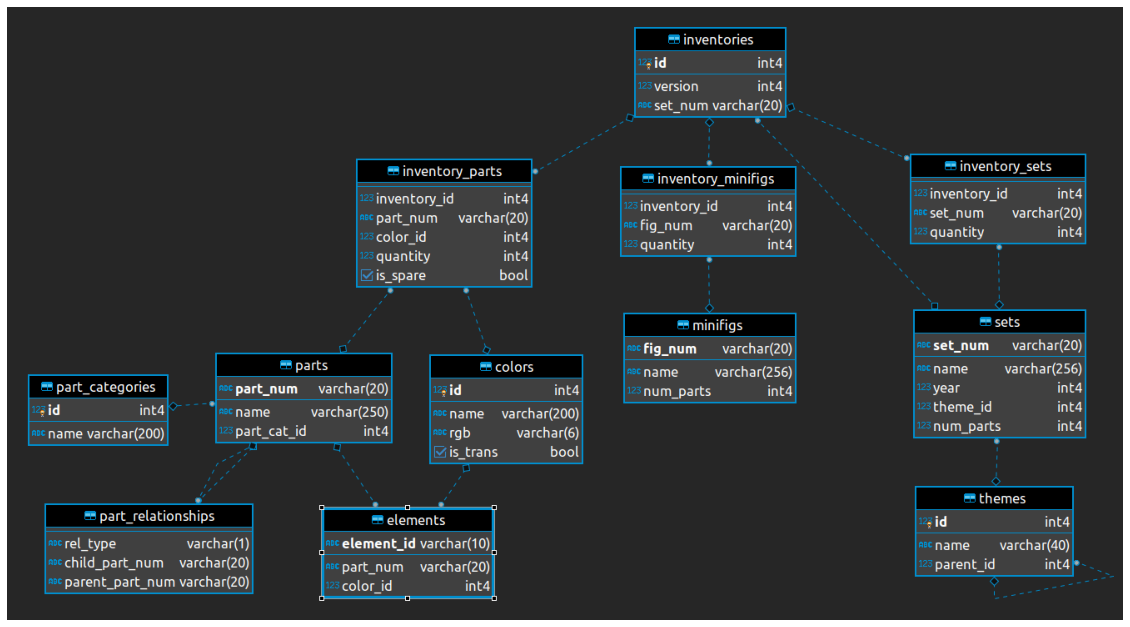

In [327]:
# Read and display the PNG image
rcParams['figure.figsize'] = 20, 50
image = mpimg.imread("vertopal.com_lego_database.png")
plt.imshow(image)
plt.axis('off')  
plt.show()

## Load Datasets 

In [333]:
#load dataset1 
color = pd.read_csv('colors.csv.gz')
color.head()

,id,name,rgb,is_trans
0,-1,[Unknown],0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


In [332]:
# load dataset2
theme = pd.read_csv('themes.csv.gz')
theme.head()

,id,name,parent_id
0,1,Technic,NaN
1,3,Competition,1.0
2,4,Expert Builder,1.0
3,16,RoboRiders,1.0
4,17,Speed Slammers,1.0


#### merge dataset1 and dataset2  files on='id'

In [331]:
# merge color and theme 
theme_color = color.merge(theme, on ='id')
theme_color.head()

,id,name_x,rgb,is_trans,name_y,parent_id
0,1,Blue,0055BF,f,Technic,NaN
1,3,Dark Turquoise,008F9B,f,Competition,1.0
2,4,Red,C91A09,f,Expert Builder,1.0
3,17,Light Green,C2DAB8,f,Speed Slammers,1.0
4,18,Light Yellow,FBE696,f,Star Wars,1.0


> Note we might need to drop parent_id 

In [330]:
#load set dataset3
sets = pd.read_csv('sets.csv.gz')
sets.head()

,set_num,name,year,theme_id,num_parts,img_url
0,001-1,Gears,1965,1,43,https://cdn.rebrickable.com/media/sets/001-1.jpg
1,0011-2,Town Mini-Figures,1979,67,12,https://cdn.rebrickable.com/media/sets/0011-2.jpg
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0,https://cdn.rebrickable.com/media/sets/0011-3.jpg
3,0012-1,Space Mini-Figures,1979,143,12,https://cdn.rebrickable.com/media/sets/0012-1.jpg
4,0013-1,Space Mini-Figures,1979,143,12,https://cdn.rebrickable.com/media/sets/0013-1.jpg


In [329]:
# load inventory set dataset4
inventory_set = pd.read_csv('inventory_sets.csv.gz')
inventory_set.head()

,inventory_id,set_num,quantity
0,35,75911-1,1
1,35,75912-1,1
2,39,75048-1,1
3,39,75053-1,1
4,50,4515-1,1


In [334]:
#load inventory dataset5
inventory = pd.read_csv('inventories.csv.gz')
inventory.head()

,id,version,set_num
0,1,1,7922-1
1,3,1,3931-1
2,4,1,6942-1
3,15,1,5158-1
4,16,1,903-1


#### Merge dataset5 and dataset4

In [335]:
#merge inv_set and inventory data set on set num 
set_int = inventory_set.merge(inventory, how='left')
set_int.head()

,inventory_id,set_num,quantity,id,version
0,35,75911-1,1,11148,1
1,35,75912-1,1,703,1
2,39,75048-1,1,14828,1
3,39,75053-1,1,7399,1
4,39,75053-1,1,18274,2


#### mergeddata of(4and5) with sets dataset 3

In [29]:
# merge inventory dataset with merged sets inventory on set_num
dataset = set_int.merge (sets, on='set_num')
dataset.head()

,inventory_id,set_num,quantity,id,version,name,year,theme_id,num_parts,img_url
0,35,75911-1,1,11148,1,McLaren Mercedes Pit Stop,2015,601,340,https://cdn.rebrickable.com/media/sets/75911-1...
1,35,75912-1,1,703,1,Porsche 911 GT Finish Line,2015,601,573,https://cdn.rebrickable.com/media/sets/75912-1...
2,39,75048-1,1,14828,1,The Phantom,2014,158,234,https://cdn.rebrickable.com/media/sets/75048-1...
3,39,75053-1,1,7399,1,The Ghost,2014,158,929,https://cdn.rebrickable.com/media/sets/75053-1...
4,39,75053-1,1,18274,2,The Ghost,2014,158,929,https://cdn.rebrickable.com/media/sets/75053-1...


#### merge the mergeddataset on id on file 2 and merged_dataset

In [154]:
#lets merge the themr with the merged data to extract the theme names by creatin a new theme color name 
datasets = pd.merge(dataset, theme, left_on='theme_id', right_on='id', suffixes=('_set', '_theme'))
datasets['theme_name'] = datasets['name_theme']

>> We have our data that we will be working with, however we can modify the data incase we get new data or need more data

## EDA Exploratory Data Annalysis 

In [157]:
#Make a copy of the dataset 
df = datasets.copy()

### Statistical analysis 

In [158]:
#write a function to get data set information 
def stat_dataset(s):
    s.info()
    s.describe()
    columns = s.columns
    n_rows, n_cols = s.shape
    n_rows, n_cols
    duplicated_sum = s.duplicated().sum()
    duplicated_sum
    na_sum = s.isna().sum()
    na_sum
    ma=s['year'].max()
    ma
    mi=s['year'].min()
    mi
    
    # Create a DataFrame to represent the table
    table = pd.DataFrame({
        'Number of Rows': [n_rows],
        'Number of Columns': [n_cols],
        'Duplicated Rows': [duplicated_sum],
        'Missing Values': [na_sum],
        'current year': [ma],
        'Start year':[mi]
    })
    
    return table
result_table = stat_dataset(df)
result_table

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4689 entries, 0 to 4688
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   inventory_id  4689 non-null   int64  
 1   set_num       4689 non-null   object 
 2   quantity      4689 non-null   int64  
 3   id_set        4689 non-null   int64  
 4   version       4689 non-null   int64  
 5   name_set      4689 non-null   object 
 6   year          4689 non-null   int64  
 7   theme_id      4689 non-null   int64  
 8   num_parts     4689 non-null   int64  
 9   img_url       4689 non-null   object 
 10  id_theme      4689 non-null   int64  
 11  name_theme    4689 non-null   object 
 12  parent_id     2748 non-null   float64
 13  theme_name    4689 non-null   object 
dtypes: float64(1), int64(8), object(5)
memory usage: 549.5+ KB


,Number of Rows,Number of Columns,Duplicated Rows,Missing Values,current year,Start year
0,4689,14,0,inventory_id 0 set_num 0 quan...,2023,1964


> From information above we have no :

> duplicates or missing values 

> Data set is from 1964 - 2023 

> we do have duplicated columns lets work on them by dropping 

### Feature Engineering 



In [286]:
# Get the value counts for the theme_name column
theme_counts = df['theme_name'].value_counts()
#theme_counts
# Find theme names with count < 10 turn to alist 
theme_names_below_10 = theme_counts[theme_counts < 10].index.tolist()
#theme_names_below_10
# Create a new column 'modified_theme_name' with categorized theme names lets do this to keep original column
df['modified_theme_name'] = df['theme_name']
#finalize by replacing with the 'other' elemet
df.loc[df['theme_name'].isin(theme_names_below_10), 'modified_theme_name'] = 'Other'
df.head()

,inventory_id,quantity,id_set,version,year,theme_id,num_parts,img_url,theme_name,num_parts_standardized,modified_theme_name
0,35,1,11148,1,2015,601,340,https://cdn.rebrickable.com/media/sets/75911-1...,Speed Champions,1.027852,Other
1,35,1,703,1,2015,601,573,https://cdn.rebrickable.com/media/sets/75912-1...,Speed Champions,2.135397,Other
2,5600,1,1215,1,2015,601,167,https://cdn.rebrickable.com/media/sets/75899-1...,Speed Champions,0.205512,Other
3,5600,1,3334,1,2015,601,156,https://cdn.rebrickable.com/media/sets/75908-1...,Speed Champions,0.153224,Other
4,5600,1,15125,1,2015,601,171,https://cdn.rebrickable.com/media/sets/75909-1...,Speed Champions,0.224525,Other


### Drop Duplicated columns 

In [160]:
#drop duplicate columns 
df = df.drop(['set_num', 'name_set', 'id_theme', 'name_theme', 'parent_id'], axis=1 )

,inventory_id,quantity,id_set,version,year,theme_id,num_parts,img_url,theme_name
0,35,1,11148,1,2015,601,340,https://cdn.rebrickable.com/media/sets/75911-1...,Speed Champions
1,35,1,703,1,2015,601,573,https://cdn.rebrickable.com/media/sets/75912-1...,Speed Champions
2,5600,1,1215,1,2015,601,167,https://cdn.rebrickable.com/media/sets/75899-1...,Speed Champions
3,5600,1,3334,1,2015,601,156,https://cdn.rebrickable.com/media/sets/75908-1...,Speed Champions
4,5600,1,15125,1,2015,601,171,https://cdn.rebrickable.com/media/sets/75909-1...,Speed Champions
...,...,...,...,...,...,...,...,...,...
4684,156280,1,156289,1,2023,743,7,https://cdn.rebrickable.com/media/sets/71037-8...,Series 24 Minifigures
4685,156280,1,156290,1,2023,743,10,https://cdn.rebrickable.com/media/sets/71037-9...,Series 24 Minifigures
4686,156312,36,152376,1,2023,743,0,https://cdn.rebrickable.com/media/sets/71037-0...,Series 24 Minifigures
4687,157961,6,152376,1,2023,743,0,https://cdn.rebrickable.com/media/sets/71037-0...,Series 24 Minifigures


### Outliers 

Plot boxplots to visualize numerical outliers 

<AxesSubplot:>

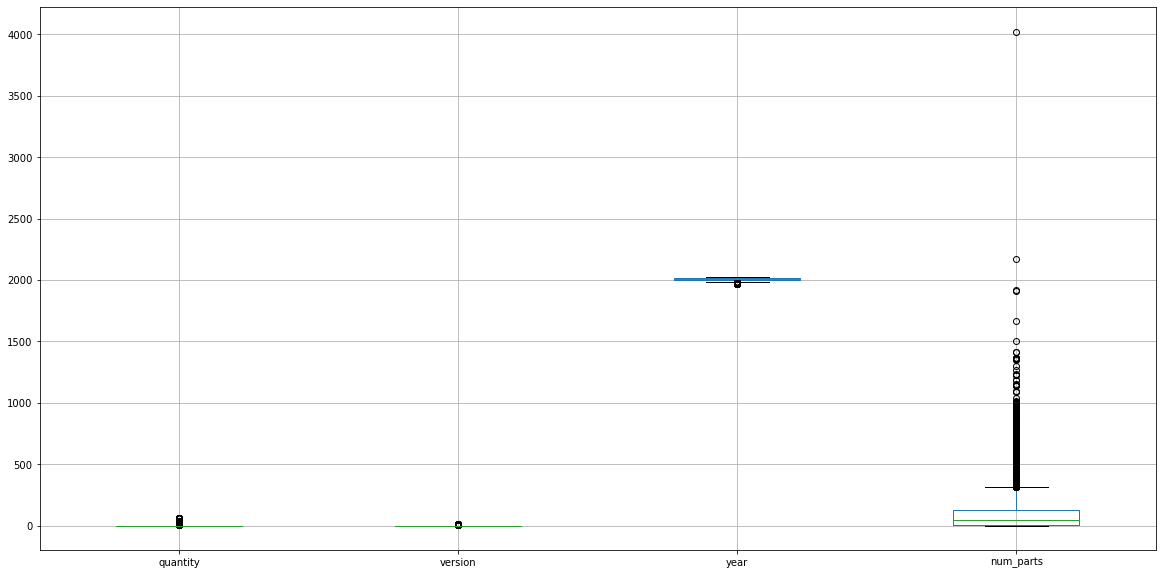

In [178]:
#plot boxplots
#fig size 
rcParams['figure.figsize'] = 20, 10
#drop unnecessary columns 
outliers = df.drop(['inventory_id', 'id_set', 'theme_id'], axis=1)
#plot 
outliers.boxplot()

Observation: we have an outlier in the num_part. 
    Note : This is possibly a true value, lets do abit digging  :)

In [182]:
#find out the theme name 
df[df['num_parts']==4024]

,inventory_id,quantity,id_set,version,year,theme_id,num_parts,img_url,theme_name
2023,136356,1,7869,1,2016,171,4024,https://cdn.rebrickable.com/media/sets/75159-1...,Ultimate Collector Series


> Observation : Yes makes sense these are "Big Ships" it does make sense dor theme to mave such numbers 
    
    Next steps on Outlier : Lets Standardise the num_parts column

### Dealing with Outliers 

### Standardize the column Num_part

In [183]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the 'num_parts' column
scaler.fit(df[['num_parts']])

# Transform the 'num_parts' column using the scaler
df['num_parts_standardized'] = scaler.transform(df[['num_parts']])

##### Confirm the standardization 

<AxesSubplot:>

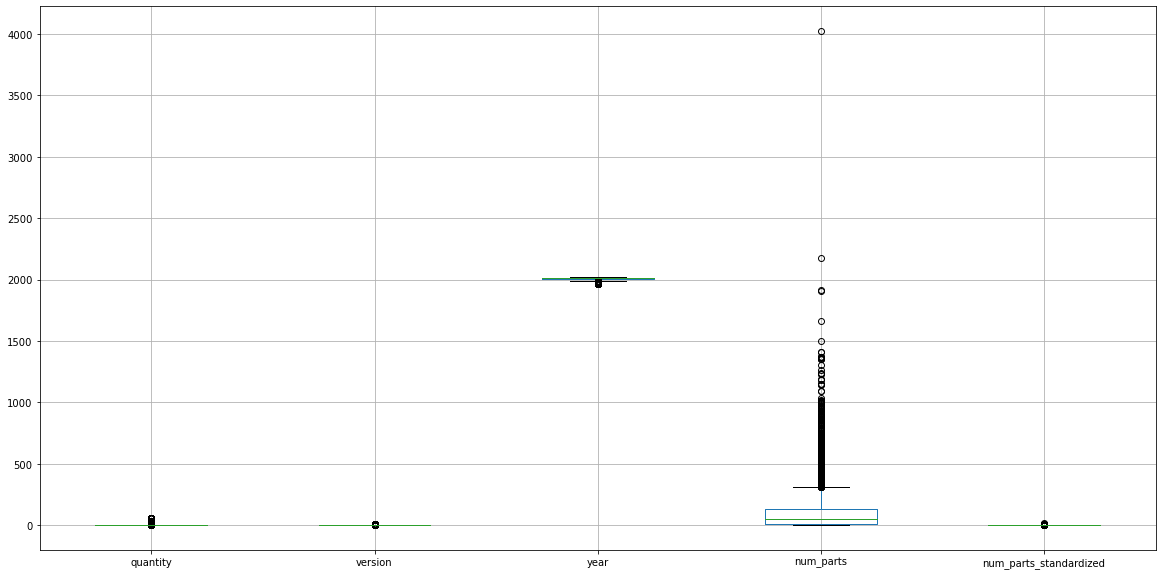

In [187]:
#plot boxplots
#fig size 
rcParams['figure.figsize'] = 20, 10
#drop unnecessary columns 
outliers = df.drop(['inventory_id', 'id_set', 'theme_id'], axis=1)
#plot 
outliers.boxplot()

## Data Visualisations 

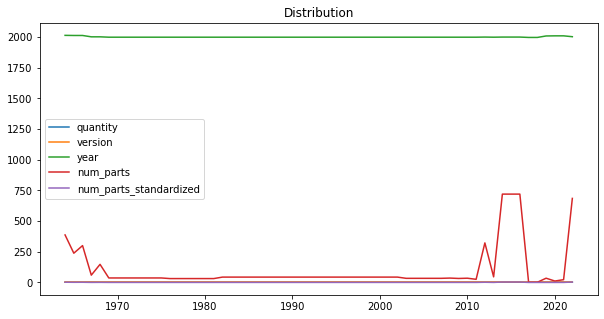

In [191]:
#plot year distribution
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5
#drop unnecessary columns 
x = df.drop(['inventory_id','id_set', 'theme_id', ], axis=1)
#plot
x[1964:2023].plot()
plt.title('Distribution');

> Theme id(categorical rep of sets) and number parts(set counts) of the sets are dominating, this is interesting. Lets dig deeper

#### Theme_name Categorical plot 

<AxesSubplot:>

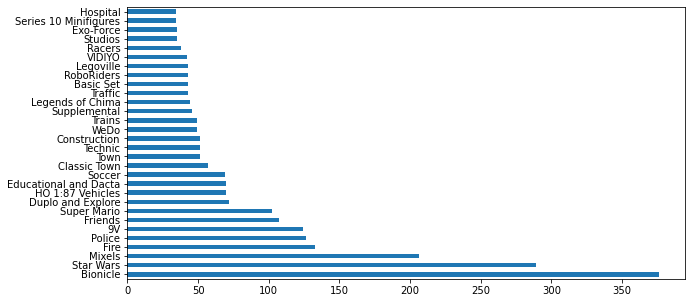

In [260]:
#Theme_name value_count plot
t = df.theme_name.value_counts().head(30)
t.plot(kind='barh')

> Observation:
    
    Theme Bionicle seme to dominate interms of value_counts 

#### Plot numparts distribution over the years

Text(0.5, 1.0, 'Count_scatter_Distribution')

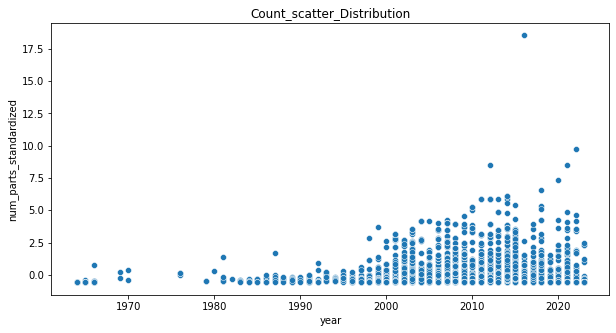

In [257]:
#num_parts scatter plot distribution 
from plotly.subplots import make_subplots
import plotly.graph_objects as go
sns.scatterplot(data=df,x='year', y='num_parts_standardized')
plt.title('Count_scatter_Distribution')

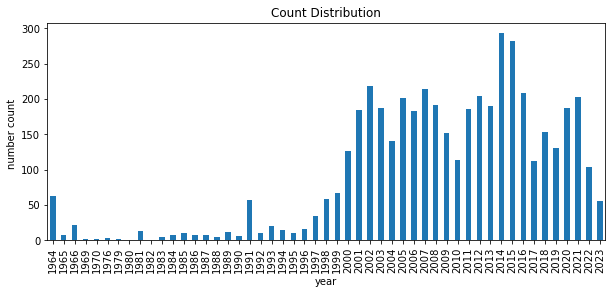

In [262]:
#Plot numparts distribution cover the years
plt.figure(figsize=(10,4))
df.groupby(df['year'])['num_parts_standardized'].count().plot(kind='bar')
plt.title('Count Distribution')
plt.ylabel('number count ');

#### Observation: 

Gradual increase overtime in the number of pieces, there is a point of interest years btwen 2014 and 2015 where the number were highest  

In [166]:
#the highest points of 2014 and 2015, confirmation that they have the highest counts 
df['year'].value_counts().head(5)

2014    293
2015    282
2002    219
2007    214
2016    208
Name: year, dtype: int64

In [254]:
import plotly.express as px
fig = px.strip(df, x='year', y='num_parts_standardized', orientation='h', color='theme_name')
fig.show()

In [338]:
fig = px.strip(df, x='year', y='id_set', orientation='h', color='theme_name')
fig.show()

>> There is a trend in the 20th century Star wars seem to be popular 

In [341]:
color.head()

,id,name,rgb,is_trans
0,-1,[Unknown],0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


In [342]:
df.head()

,inventory_id,quantity,id_set,version,year,theme_id,num_parts,img_url,theme_name,num_parts_standardized,modified_theme_name
0,35,1,11148,1,2015,601,340,https://cdn.rebrickable.com/media/sets/75911-1...,Speed Champions,1.027852,Other
1,35,1,703,1,2015,601,573,https://cdn.rebrickable.com/media/sets/75912-1...,Speed Champions,2.135397,Other
2,5600,1,1215,1,2015,601,167,https://cdn.rebrickable.com/media/sets/75899-1...,Speed Champions,0.205512,Other
3,5600,1,3334,1,2015,601,156,https://cdn.rebrickable.com/media/sets/75908-1...,Speed Champions,0.153224,Other
4,5600,1,15125,1,2015,601,171,https://cdn.rebrickable.com/media/sets/75909-1...,Speed Champions,0.224525,Other


# Conclusion 

